- 일반화, 과대적합, 과소적합
- 일반화란? train세트로 학습된 모델이 test세트에 대해 정확히 예측하도록 하는것
- 즉, 일반화 성능이 최적화 되는 모델을 찾는 것이 목표

- 과대적합이 일어나는 이유?
- 데이터가 많지 않아서 ? : 데이터의 편향

- 머신러닝 과정
- 문제정의(주제정하기) -> 데이터수집 -> 전처리(가공) -> EDA(탐색적 데이터 분석)
- -> 모델선택 및 하이퍼파라미터조정 -> 모델학습 -> 모델평가 -> 서비스화 

- 특성이 많은 경우 특성을 줄여서 일반화
- 데이터 편향이 일어나는 경우 비율을 맞춰서 데이터 수집
- 모델이 복잡한경우 
- 1.knn모델 : k값이 작을수록 모델이 복잡 k 값 증가시키기
- 2.Decision Tree모델 : max_depth(트리의 최대 깊이),질문의 수가 많으면 복잡(과대)

- 선형모델 : 선형함수를 만든다.(기울기, MSE(평균제곱오차))
- MSE :오차 관련 지표를 최소화

- 정규화 : L1규제 Lasso , L12규제 Ridge  
- Lasso : 모든 특성에 대해서 같은 힘으로 규제, 특정계수들은 0이 된다.
-         특성선택(Feature Selection)이 자동으로 이루어 진다.
- Ridge : 모든 특성에 골고루 규제, 0에 가깝게 만든다.

- Logistic Regression
- 선형 함수의 결과값을 Sigmoid Function(Logistic Regression)을 이용해 0과 1사이값으로 변환한다.
- Binary Cross-Entropy Loss 사용(실제값과 예측값이 차이가 있기때문에)

- SVM(support vector machine)
- 다차원 공간상에서 두 집단을 분리하는 초평면(hyperplane)이라고 불리는 최적의 경계면(flat boundary)을 탐색하여 분류하는 모델 최대마진분류기라고도 불린다.
- 마진(margin): 두 집단에서 서로 가장 가까이 위치한 점간의 거리
- 초평면(hyperplane)집단을 분할하는 기준, 마진의 중앙을 통과
- 서포트벡터: 마진의 경계선상에 있는 점들

- 주요 매개변수(Hyperparameter)
- 회귀 선형 모델 : alpha (값이 클수록 규제가 강해진다.)
- 선형 분류 모댈 : c (값이 클수록 규제가 약해진다.)
- 기본적으로 L2규제를 사용, but 중요한 특성이 몇 개 없다면 L1규제를 사용해도 무방

## 목표! 
- 손 글씨 숫자(0~9)를 분류하는 모델을 만들어보자.
- 이미지 데이터의 형태를 이해

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [34]:
data = pd.read_csv('./data/digit_train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
data.shape
# 42.000개 손글씨 데이터
#정답을 포함해 785개의 컬럼

(42000, 785)

In [36]:
data.iloc[0, :150]
# label : 답 , pixel0~ : 문제

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel144    0
pixel145    0
pixel146    0
pixel147    0
pixel148    0
Name: 0, Length: 150, dtype: int64

In [37]:
img0 = data.iloc[0,1:]

In [38]:
print(img0.max())
print(img0.min())
# 색(RGB)??

255
0


In [39]:
img0.values # array배열로 확인가능

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

784 > 2차원 28행, 28열 

In [40]:
# 시리즈 형태(1차원)로 되어 있는 img0을 2차원으로 img0 reshape
img0.values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

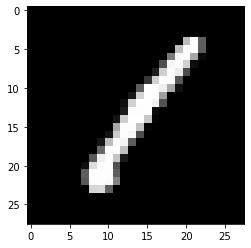

In [41]:
plt.imshow(img0.values.reshape(28,28), cmap='gray')

In [42]:
data.iloc[0,0]

1

### 5000장 추출

In [43]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X = data.iloc[0:5000, 1:] #문제
y = data.iloc[0:5000, 0] #답

In [45]:
print(X.shape)
print(y.shape)

(5000, 784)
(5000,)


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, #문제
                                                    y, #답
                                                    test_size= 0.3,
                                                    random_state= 5)

### 모델링 (4가지 다 해보쟈 !)
- KNN
- Decision tree
- Logistic regression
- Linear SVM

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score

In [49]:
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
logi = LogisticRegression()
svm = LinearSVR()

In [50]:
knn_result = cross_val_score(knn, X_train, y_train, cv = 5)
tree_result = cross_val_score(tree, X_train, y_train, cv = 5)
logi_result = cross_val_score(logi, X_train, y_train, cv = 5)
svm_result = cross_val_score(svm, X_train, y_train, cv = 5)

C:\Users\SMT107\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SMT107\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [51]:
print('knn : ', knn_result.mean())
print('tree : ', tree_result.mean())
print('logi : ', logi_result.mean())
print('svm : ', svm_result.mean())

knn :  0.9154285714285715
tree :  0.7431428571428571
logi :  0.872857142857143
svm :  0.08573152000962836


## 스케일링

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
mms = MinMaxScaler()

In [54]:
mms.fit(X_train)

MinMaxScaler()

In [55]:
X_train_s = mms.transform(X_train)
X_test_s = mms.transform(X_test)

In [61]:
svm_result2 = cross_val_score(svm, X_train_s, y_train, cv = 5).mean()
svm_result2 # 결과 값 : 0.48193404790806127

C:\Users\SMT107\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT107\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT107\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT107\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT107\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of itera

0.48193404790806127

In [62]:
knn_result = cross_val_score(knn, X_train_s, y_train, cv = 5)
tree_result = cross_val_score(tree, X_train_s, y_train, cv = 5)
logi_result = cross_val_score(logi, X_train_s, y_train, cv = 5)

C:\Users\SMT107\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SMT107\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [63]:
print('knn : ', knn_result.mean())
print('tree : ', tree_result.mean())
print('logi : ', logi_result.mean())
# 기존 결과 값
#knn :  0.9154285714285715
#tree :  0.7431428571428571
#logi :  0.872857142857143

knn :  0.9154285714285713
tree :  0.7474285714285716
logi :  0.8879999999999999


## test 데이터 확인

In [64]:
knn.fit(X_train, y_train)
tree.fit(X_train, y_train)
logi.fit(X_train, y_train)
svm.fit(X_train_s, y_train) # svm모델만 스케일링 진행한 모델로 학습

C:\Users\SMT107\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SMT107\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR()

In [65]:
print('knn :', knn.score(X_test, y_test))
print('tree :', tree.score(X_test, y_test))
print('logi :', logi.score(X_test, y_test))
print('svm :', svm.score(X_test_s, y_test))

knn : 0.922
tree : 0.7746666666666666
logi : 0.87
svm : 0.3445602585389249


## 분류평가지표

In [66]:
from sklearn.metrics import classification_report

In [68]:
pre = knn.predict(X_test)
print(classification_report(pre, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       149
           1       0.99      0.89      0.94       201
           2       0.89      0.96      0.92       160
           3       0.91      0.91      0.91       138
           4       0.87      0.93      0.90       149
           5       0.93      0.92      0.93       132
           6       0.96      0.95      0.95       162
           7       0.92      0.93      0.92       150
           8       0.82      0.93      0.87       100
           9       0.92      0.84      0.88       159

    accuracy                           0.92      1500
   macro avg       0.92      0.92      0.92      1500
weighted avg       0.92      0.92      0.92      1500

